In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random, sqrt
from qiskit.quantum_info import Statevector, Operator

In [2]:
state = QuantumRegister(4,  name="|ψ>")

ancilla = QuantumRegister(2, name="A")

syndrome = ClassicalRegister(2, name="S")

In [3]:
circuit = QuantumCircuit(state, ancilla, syndrome)
circuit.u(theta = random.random() * 2 * pi,
    phi = random.random() * 2 * pi,
    lam = random.random() * 2 * pi,
    qubit = state[0])
circuit.u(theta = random.random() * 2 * pi,
    phi = random.random() * 2 * pi,
    lam = random.random() * 2 * pi,
    qubit = state[1])


circuit.cx(state[0], state[2])
circuit.cx(state[1], state[2])

circuit.h(state[3])

circuit.cx(state[3], state[2])
circuit.cx(state[3], state[1])
circuit.cx(state[3], state[0])

In [4]:
p_I_x = 0.5
p_I_z = 0.5
def error_gate_x(qubit):
    rand_num = random.random()
    if rand_num >= p_I_x:
        circuit.x(qubit)

def error_gate_z(qubit):
    rand_num = random.random()
    if rand_num >= p_I_z:
        circuit.z(qubit)

In [5]:
circuit.barrier()
choice = random.randint(0,4)
error_gate_x(state[choice])
error_gate_z(state[choice])

In [6]:
circuit.barrier()
circuit.h(ancilla)
for i in state:
    circuit.cz(ancilla[0], i)
    circuit.cx(ancilla[1], i)
circuit.h(ancilla)
circuit.measure(ancilla, syndrome)

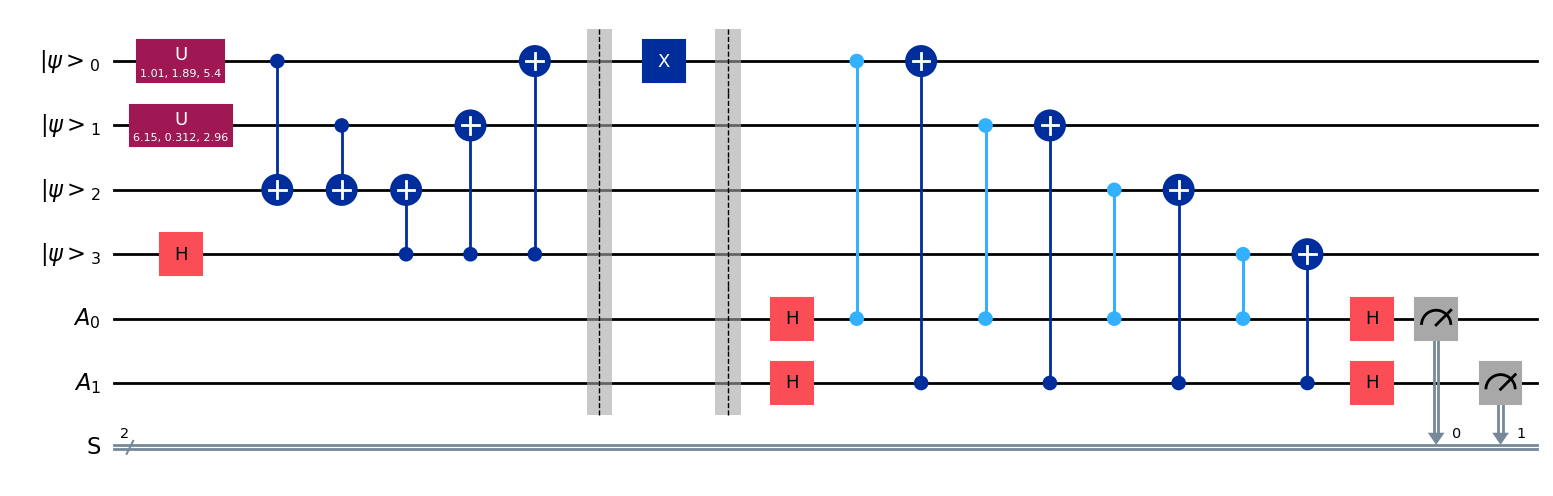

In [7]:
display(circuit.draw(output='mpl'))

In [8]:
result = AerSimulator().run(circuit).result()
statistics = result.get_counts()
for k,v in statistics.items():
    print(k)

01
